## overview

In [1]:
# default package
import logging
import sys 
import os
import pathlib
import IPython
import random

In [2]:
# third party package
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from tqdm import tqdm
import pymc3 as pm
import seaborn as sns
import theano.tensor as tt

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
# my package
sys.path.append(os.path.join(pathlib.Path().resolve(),"../"))

In [4]:
# reload settings
%load_ext autoreload
%autoreload 2

In [5]:
# logger
logger=logging.getLogger(__name__)
logging.basicConfig(level=logging.ERROR)

In [6]:
# graph setting
sns.set()

## read data

<BarContainer object of 74 artists>

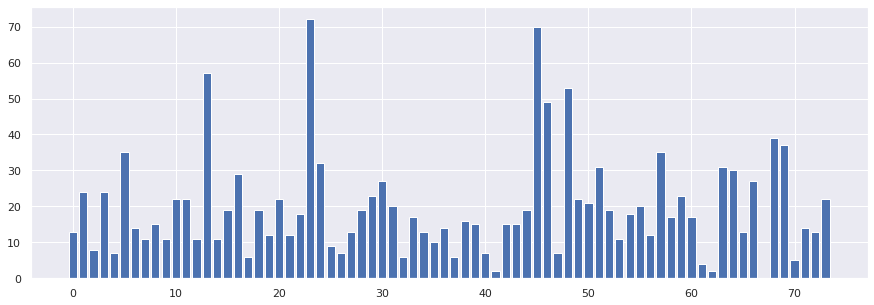

In [7]:
count_data = np.loadtxt("data/txtdata.csv")
n_count_data = len(count_data)
plt.figure(figsize=(15,5))
plt.bar(np.arange(n_count_data), count_data)

## model

In [8]:
with pm.Model() as model:
    alpha = 1.0/count_data.mean()  
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data - 1)

In [9]:
with model:
    idx = np.arange(n_count_data) 
    lambda_ = pm.math.switch(tau > idx, lambda_1, lambda_2)

In [10]:
with model:
    observation = pm.Poisson("obs", lambda_, observed=count_data)

In [11]:
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step,return_inferencedata=False)

Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
INFO:pymc3:CompoundStep
>Metropolis: [tau]
INFO:pymc3:>Metropolis: [tau]
>Metropolis: [lambda_2]
INFO:pymc3:>Metropolis: [lambda_2]
>Metropolis: [lambda_1]
INFO:pymc3:>Metropolis: [lambda_1]


Sampling 4 chains for 5_000 tune and 10_000 draw iterations (20_000 + 40_000 draws total) took 10 seconds.
INFO:pymc3:Sampling 4 chains for 5_000 tune and 10_000 draw iterations (20_000 + 40_000 draws total) took 10 seconds.
The number of effective samples is smaller than 25% for some parameters.
INFO:pymc3:The number of effective samples is smaller than 25% for some parameters.


In [12]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

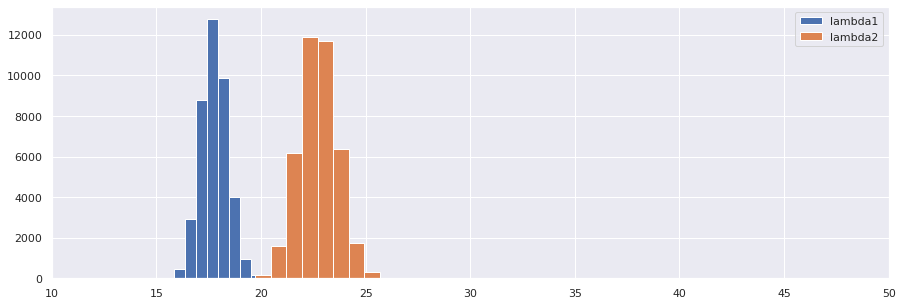

In [13]:
plt.figure(figsize=(15,5))
plt.hist(lambda_1_samples,label="lambda1");
plt.hist(lambda_2_samples,label="lambda2");
plt.xlim(10,50)
plt.legend();

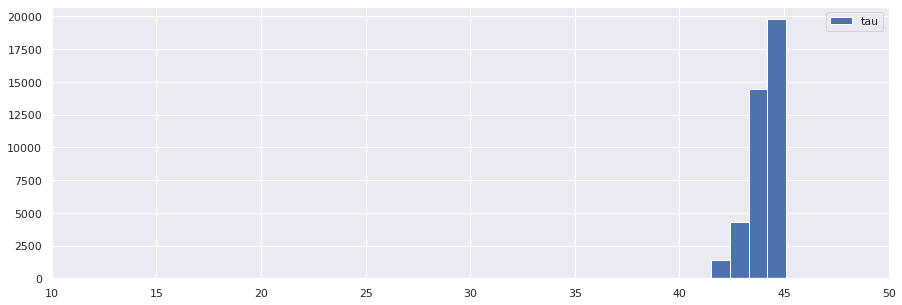

In [14]:
plt.figure(figsize=(15,5))
plt.hist(tau_samples,label="tau");
plt.xlim(10,50);
plt.legend()

In [15]:
len(tau_samples)

40000

## 演習問題

In [16]:
#1
lambda_1_samples.mean(),lambda_2_samples.mean()

(17.75404684358111, 22.726143928140246)

In [17]:
#2
((lambda_2_samples-lambda_1_samples)/lambda_1_samples).mean()

0.2816809972427125

In [18]:
#3
lambda_1_samples[tau_samples<45].mean()

17.754822234548175